In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#download from kaggle 

In [3]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [3]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
df = pd.concat([df_train, df_test])
df.shape[0]

1852394

In [5]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [6]:
df1= df[df['is_fraud']==0]
df0= df[df['is_fraud']==1]

In [7]:
df0 = df0.sample(df1.shape[0], replace=True)
df2 = pd.concat([df1, df0], axis=0)
df2.is_fraud.value_counts()

is_fraud
0    1842743
1    1842743
Name: count, dtype: int64

In [8]:
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
categorical_columns = [i for i in df2.columns if df2[i].dtype == 'object']

In [10]:
categorical_columns

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    df2[col] = encoder.fit_transform(df2[col])
df2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2703186189652095,514,8,4.97,164,18,0,576,...,36.0788,-81.1781,3495,372,791,80326,1325376018,36.011293,-82.048315,0
1,1,1,630423337322,241,4,107.23,312,161,0,439,...,48.8878,-118.2105,149,431,619,227462,1325376044,49.159047,-118.186462,0
2,2,2,38859492057661,390,0,220.11,116,386,1,610,...,42.1808,-112.2620,4154,308,309,1169030,1325376051,43.150704,-112.154481,0
3,3,3,3534093764340240,360,2,45.00,165,468,1,945,...,46.2306,-112.1138,1939,330,405,777909,1325376076,47.034331,-112.561071,0
4,4,4,375534208663984,297,9,41.96,339,153,1,422,...,38.4207,-79.4629,99,116,746,1186866,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976933,976933,959881,6500249000784905,392,11,1150.64,25,464,1,829,...,34.1572,-77.9141,186140,2,393,1508395,1359671054,33.542799,-78.567375,1
290263,290263,1560070,6597248210463122,508,2,21.55,211,480,1,620,...,43.0261,-94.4064,912,324,434,1639204,1381192898,43.475815,-93.528854,1
715102,715102,703867,180094608895855,271,8,715.88,320,181,0,592,...,43.7575,-122.4810,597,201,294,515362,1351808906,43.126232,-122.274331,1
136012,136012,134282,6011552879910390,94,4,278.40,284,253,1,538,...,41.0552,-110.1603,49,397,665,266551,1331861060,41.424347,-109.350023,1


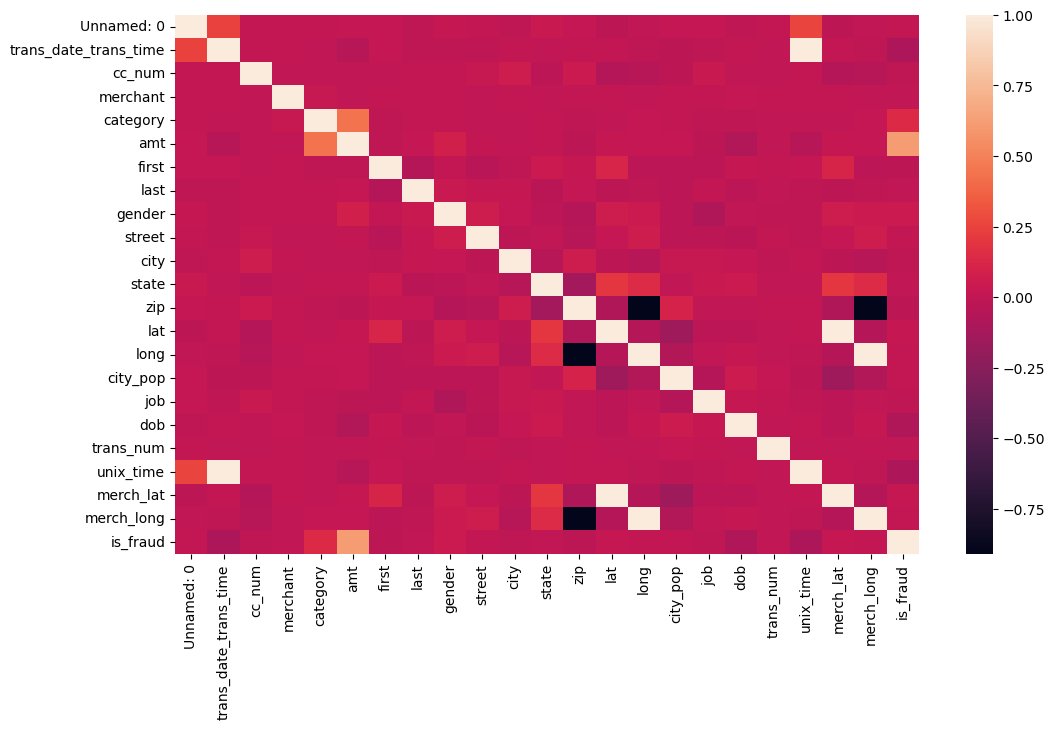

In [12]:
import seaborn as sns
import pandas as pd
cor_data = df2.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cor_data)
plt.show()

In [13]:
X = df2.drop(['is_fraud'], axis=1)
y = df2['is_fraud']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify = y)

In [19]:
y_train[0:5]

942810    1
10271     0
881957    0
123616    0
174538    0
Name: is_fraud, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=50),
    'Gradient Boosting': GradientBoostingClassifier(),
    
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
scores = []
for name, var in models.items():
    var.fit(x_train, y_train)
    y_predict = var.predict(x_test)
    scores.append({
        "Model_name": name,
        "Test Accuracy": var.score(x_test, y_test), 
        "Train Acurracy":var.score(x_train,y_train),
        "precision" : precision_score(y_test, y_predict,average='weighted',zero_division=0),
        "recall" : recall_score(y_test, y_predict,average='weighted',zero_division=0),
        "f1_score" : f1_score(y_test, y_predict,average='weighted',zero_division=0)
        
    })
df1 = pd.DataFrame(scores)
df1

In [ ]:
ran = RandomForestClassifier(n_estimators=100)
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
y_test = np.array(y_test)
y_pred[:5], y_test[:5]

In [24]:
y_test = np.array(y_test)
y_pred[:5], y_test[:5]

(array([1, 1, 1, 0, 0], dtype=int64), array([1, 1, 1, 0, 0], dtype=int64))

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       1.00      1.00      1.00    368549

    accuracy                           1.00    737098
   macro avg       1.00      1.00      1.00    737098
weighted avg       1.00      1.00      1.00    737098



In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[368379,    170],
       [     0, 368549]], dtype=int64)

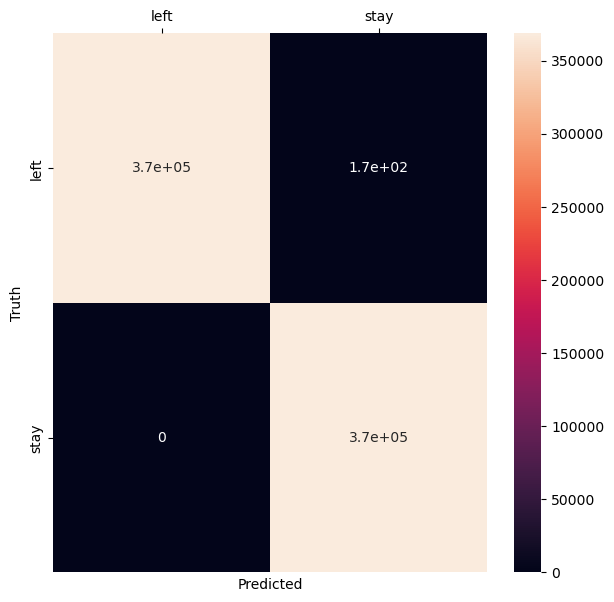

In [28]:
#Visualising the condfusion matrix in heat map
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
ax= sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
ax.xaxis.set_ticklabels(["left", "stay"])
ax.yaxis.set_ticklabels(["left", "stay"])
ax.xaxis.tick_top()

In [29]:
ran.score(x_test, y_test)

0.999769365810245